In [293]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [294]:
df = pd.read_csv('Bayleys_sales_all_added_to_use.csv')

In [295]:
df.head()

,Mapping La,Mapping Lo,Category,Reference,Sold Price,Floor Area,Bedrooms,Bathrooms,Year Built,Land Area,Confirmed,REGC2020_2,C18_Median,C18_Grou10
0,-36.745320,174.742670,House,1400600,1575000.0,300.0,5.0,3.0,NaN,NaN,29/07/2022,Auckland Region,41.2,30100
1,-36.634924,174.765481,House,1253218,1260000.0,NaN,4.0,2.0,NaN,NaN,28/02/2023,Auckland Region,41.6,37500
2,-36.881171,174.924469,House,1851981,2235000.0,220.0,4.0,2.0,1983,NaN,25/05/2022,Auckland Region,42.6,49100
3,-37.202799,174.893734,House,1971990,860000.0,NaN,3.0,2.0,NaN,NaN,21/10/2022,Auckland Region,38.5,33300
4,-36.852790,174.785802,House,1753534,2150000.0,NaN,4.0,3.0,NaN,NaN,13/04/2022,Auckland Region,58.3,31000


In [296]:
df.shape

(6773, 14)

In [297]:
df.describe()

,Mapping La,Mapping Lo,Sold Price,Floor Area,Bedrooms,Bathrooms,Land Area,C18_Median,C18_Grou10
count,6773.000000,6773.000000,6.773000e+03,3984.000000,5251.000000,6763.000000,0.0,6773.000000,6773.000000
mean,-40.720304,173.450889,1.035853e+06,173.435467,3.262236,1.349253,NaN,44.095187,38652.133471
std,3.386459,2.519089,1.287135e+06,119.519459,1.039405,0.998303,NaN,10.684826,14337.885852
min,-46.654840,167.714496,0.000000e+00,0.000000,0.000000,0.000000,NaN,16.600000,7000.000000
25%,-43.609785,172.481504,4.900000e+05,110.000000,3.000000,1.000000,NaN,35.900000,29400.000000
50%,-40.335243,174.458278,7.800000e+05,160.000000,3.000000,1.000000,NaN,42.400000,36100.000000
75%,-37.245619,175.054798,1.215000e+06,220.000000,4.000000,2.000000,NaN,50.300000,44300.000000
max,-34.992421,178.315265,7.000000e+07,4106.000000,17.000000,8.000000,NaN,85.400000,88900.000000


In [298]:
df.columns

Index(['Mapping La', 'Mapping Lo', 'Category', 'Reference', 'Sold Price',
       'Floor Area', 'Bedrooms', 'Bathrooms', 'Year Built', 'Land Area',
       'Confirmed', 'REGC2020_2', 'C18_Median', 'C18_Grou10'],
      dtype='object')

In [299]:
cols_to_drop = ['Mapping La', 'Mapping Lo', 
       'Reference','Confirmed']

In [300]:
df.drop(df[cols_to_drop],  inplace = True, axis=1)

In [301]:
df.head()

,Category,Sold Price,Floor Area,Bedrooms,Bathrooms,Year Built,Land Area,REGC2020_2,C18_Median,C18_Grou10
0,House,1575000.0,300.0,5.0,3.0,NaN,NaN,Auckland Region,41.2,30100
1,House,1260000.0,NaN,4.0,2.0,NaN,NaN,Auckland Region,41.6,37500
2,House,2235000.0,220.0,4.0,2.0,1983,NaN,Auckland Region,42.6,49100
3,House,860000.0,NaN,3.0,2.0,NaN,NaN,Auckland Region,38.5,33300
4,House,2150000.0,NaN,4.0,3.0,NaN,NaN,Auckland Region,58.3,31000


In [302]:
df.rename(columns={
   'C18_Median' :'Age',
   'C18_Grou10': 'Income'
},
inplace=True)

In [303]:
df.dtypes

Category       object
Sold Price    float64
Floor Area    float64
Bedrooms      float64
Bathrooms     float64
Year Built     object
Land Area     float64
REGC2020_2     object
Age           float64
Income          int64
dtype: object

In [304]:
df.isnull().sum()

Category       118
Sold Price       0
Floor Area    2789
Bedrooms      1522
Bathrooms       10
Year Built    4443
Land Area     6773
REGC2020_2       0
Age              0
Income           0
dtype: int64

In [305]:
df['Floor Area'].dropna(inplace=True)

In [306]:
df.isnull().sum()

Category       118
Sold Price       0
Floor Area    2789
Bedrooms      1522
Bathrooms       10
Year Built    4443
Land Area     6773
REGC2020_2       0
Age              0
Income           0
dtype: int64

In [307]:
plt.style.use('fivethirtyeight')

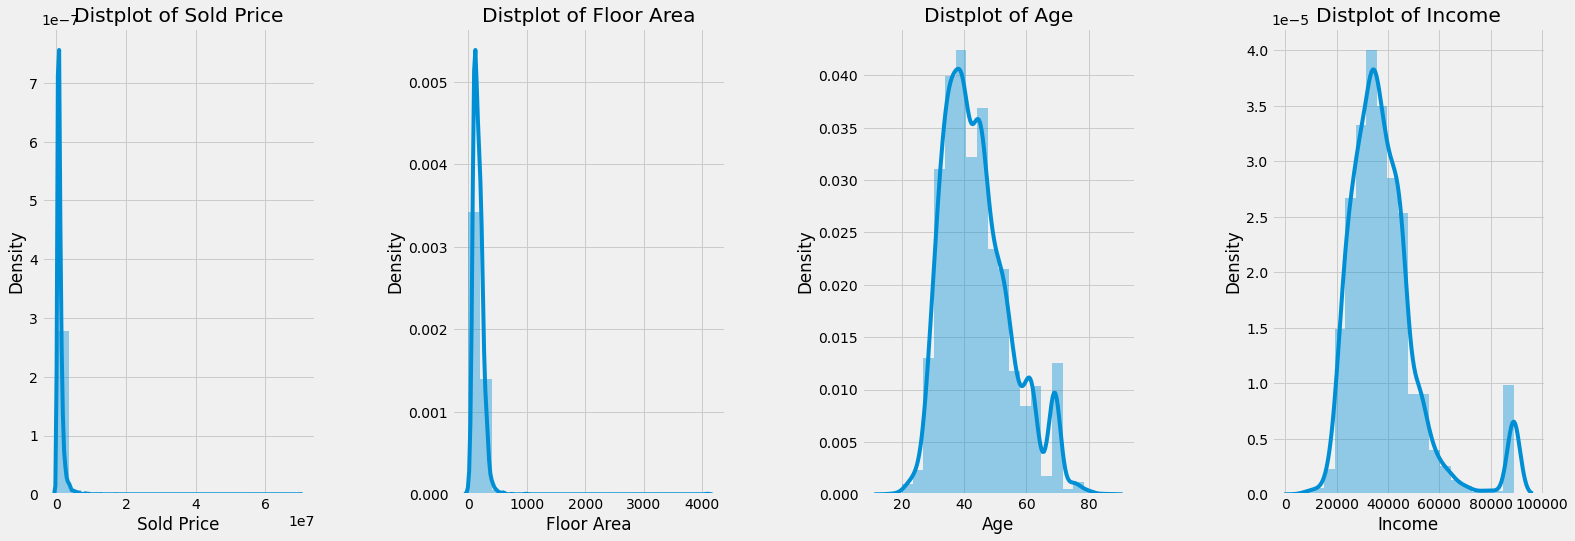

In [308]:
plt.figure(1 , figsize = (24 , 8))
n = 0 
for x in ['Sold Price', 'Floor Area','Age','Income']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [309]:
df = df.loc[ 
                    (df['Floor Area'] <= 500 ) 
                     ]

In [310]:
df = df.loc[ 
                    (df['Sold Price'] <= 3000000)
                     ]

In [311]:
df = df.loc[ 
                    (df['Income'] <= 80000)
                     ]

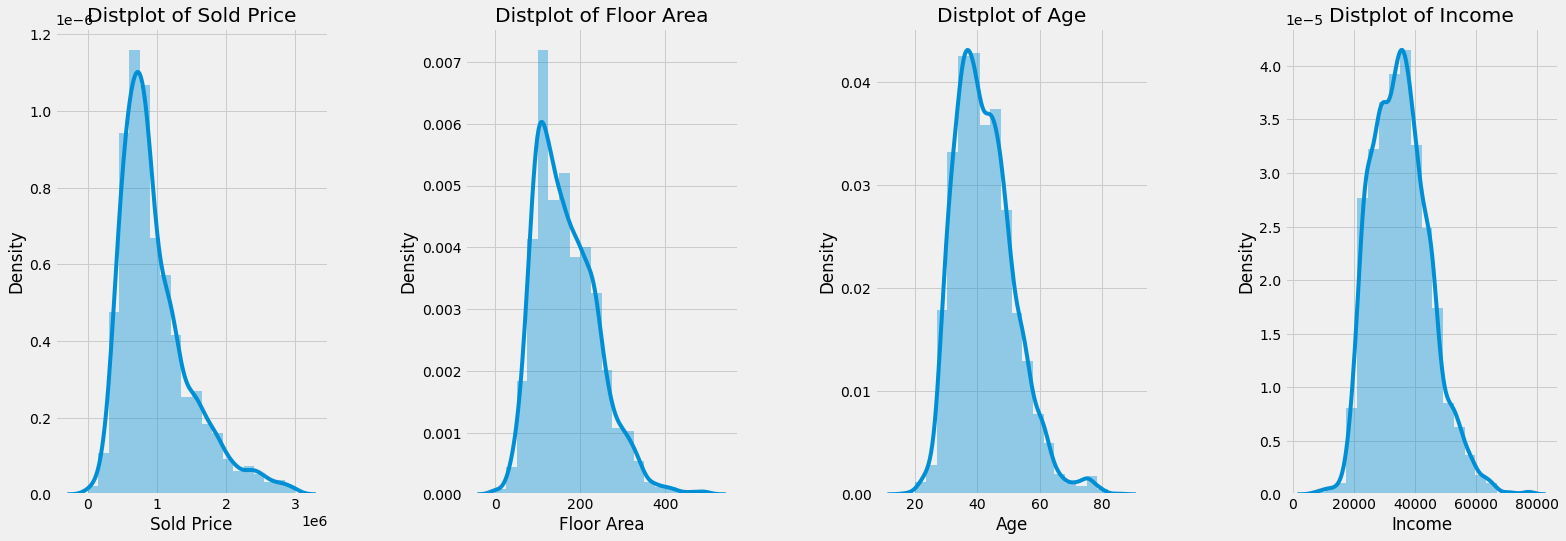

In [312]:
plt.figure(1 , figsize = (24 , 8))
n = 0 
for x in ['Sold Price', 'Floor Area','Age','Income']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

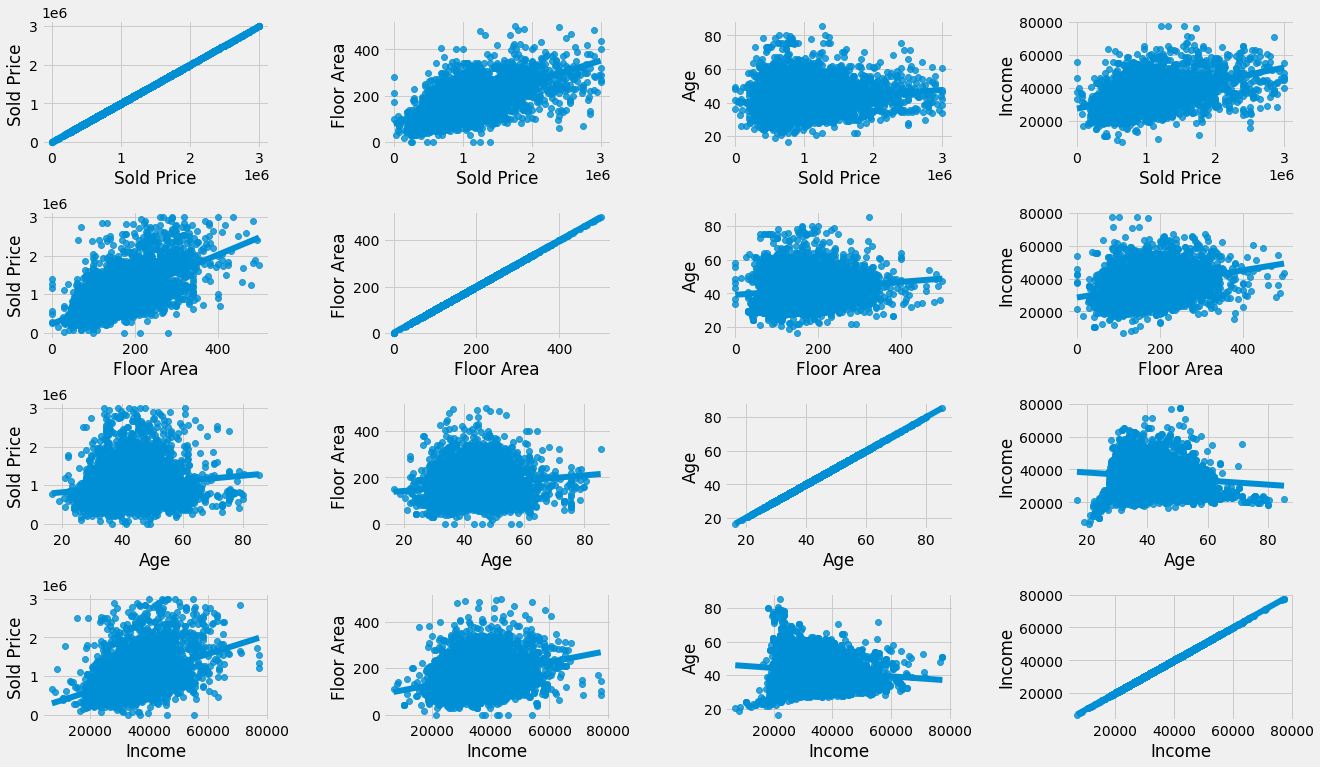

In [313]:
#Ploting the relationship between sold price and floor area
plt.figure(1 , figsize = (20 , 12))
n = 0 
for x in ['Sold Price' , 'Floor Area','Age','Income']:
    for y in ['Sold Price' , 'Floor Area','Age','Income']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

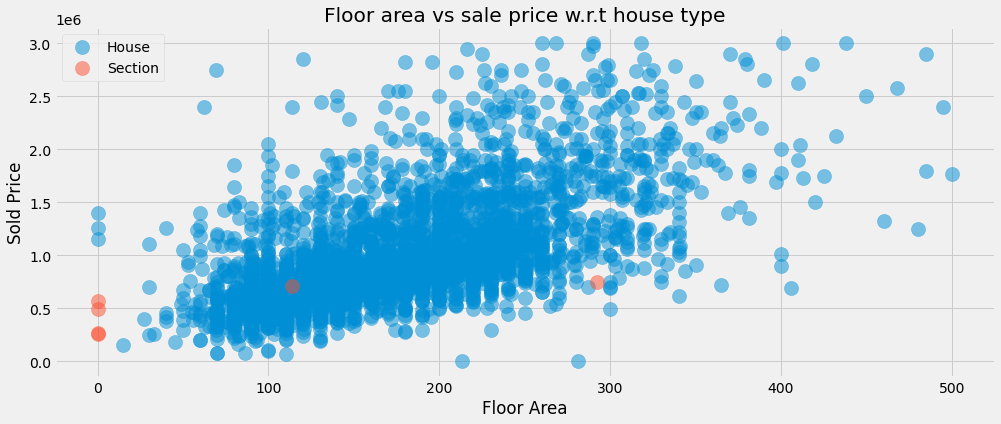

In [314]:
#Plot the relationship between Category, floor area and sale price
plt.figure(1 , figsize = (15 , 6))
for house_type in ['House' , 'Section']:
    plt.scatter(x = 'Floor Area' , y = 'Sold Price' , data = df[df['Category'] == house_type] ,
                s = 200 , alpha = 0.5 , label = house_type)
plt.xlabel('Floor Area'), plt.ylabel('Sold Price') 
plt.title('Floor area vs sale price w.r.t house type')
plt.legend()
plt.show()

In [315]:
df.dtypes

Category       object
Sold Price    float64
Floor Area    float64
Bedrooms      float64
Bathrooms     float64
Year Built     object
Land Area     float64
REGC2020_2     object
Age           float64
Income          int64
dtype: object

In [316]:
df['Sold Price'] = df['Sold Price'].astype('int64')

In [317]:
df['Floor Area'] = df['Floor Area'].astype('int64')

In [318]:
df['Age'] = df['Age'].astype('int64')

In [319]:
df.dtypes

Category       object
Sold Price      int64
Floor Area      int64
Bedrooms      float64
Bathrooms     float64
Year Built     object
Land Area     float64
REGC2020_2     object
Age             int64
Income          int64
dtype: object

In [320]:
df.head()

,Category,Sold Price,Floor Area,Bedrooms,Bathrooms,Year Built,Land Area,REGC2020_2,Age,Income
0,House,1575000,300,5.0,3.0,NaN,NaN,Auckland Region,41,30100
2,House,2235000,220,4.0,2.0,1983,NaN,Auckland Region,42,49100
9,Apartment,2850000,132,2.0,2.0,NaN,NaN,Auckland Region,52,70900
15,Townhouse,866000,118,3.0,2.0,NaN,NaN,Auckland Region,75,23300
20,Townhouse,725000,85,2.0,1.0,NaN,NaN,Auckland Region,30,58400


In [321]:
#Alternative
'''Age and sale price'''
X1 = df[['Age' , 'Sold Price']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

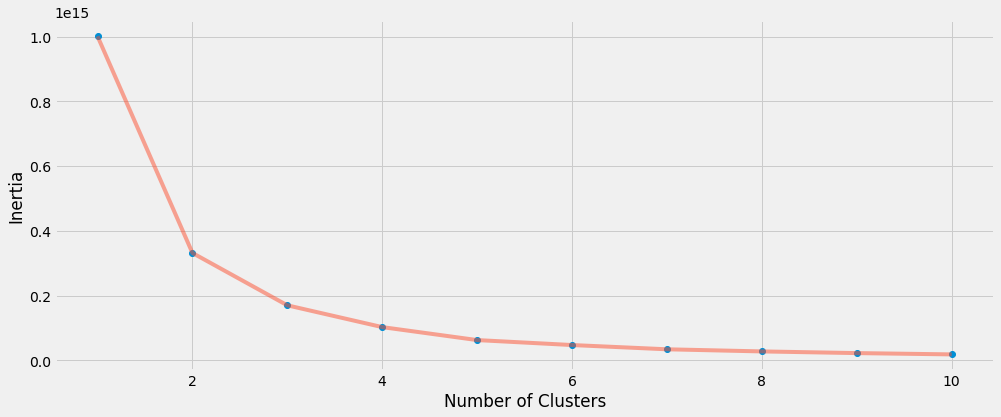

In [322]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [323]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [324]:
h = 1
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1


In [325]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [326]:
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

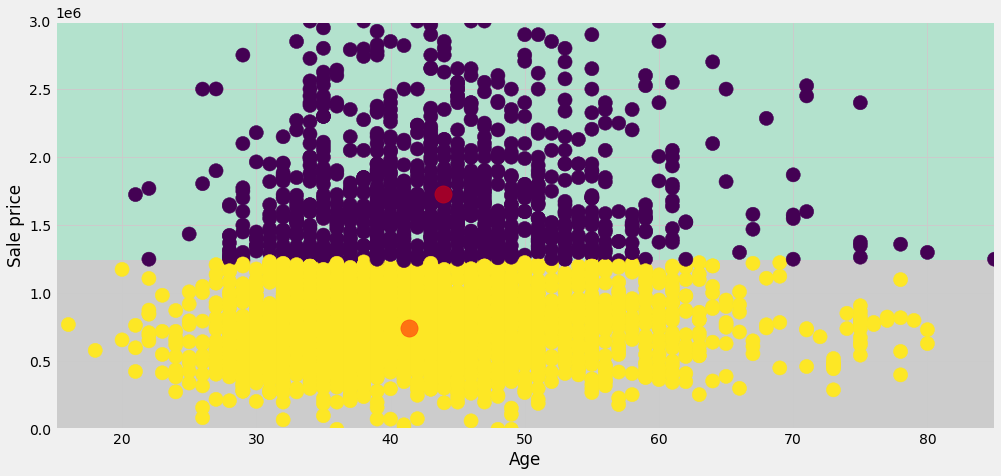

In [327]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Sold Price' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Sale price') , plt.xlabel('Age')
plt.show()

In [328]:
'''Income and sale price'''
X2 = df[['Income' , 'Sold Price']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

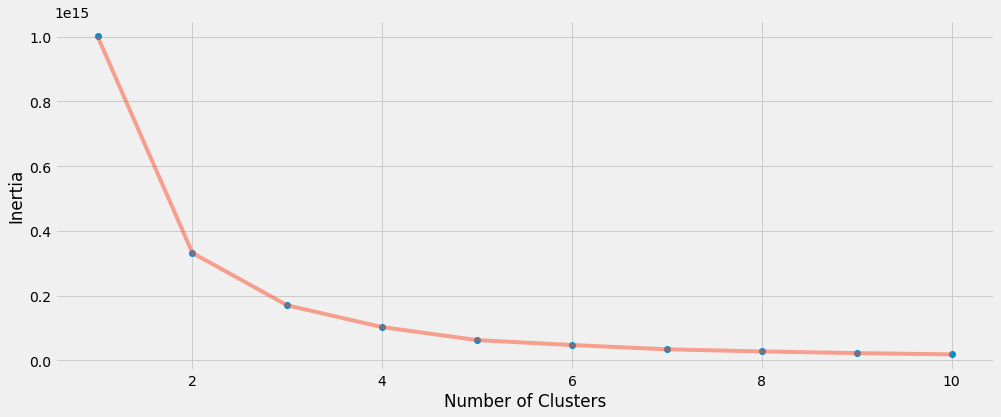

In [329]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [330]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [331]:
h = 100
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

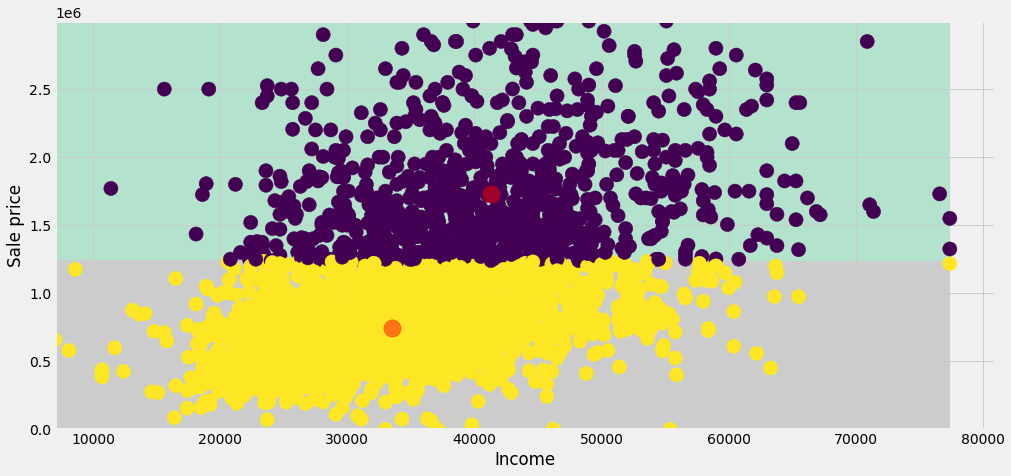

In [332]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'Sold Price' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Sale price') , plt.xlabel('Income')
plt.show()

In [333]:
#age, income vs sale price
X3 = df[['Age' , 'Income' ,'Sold Price']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

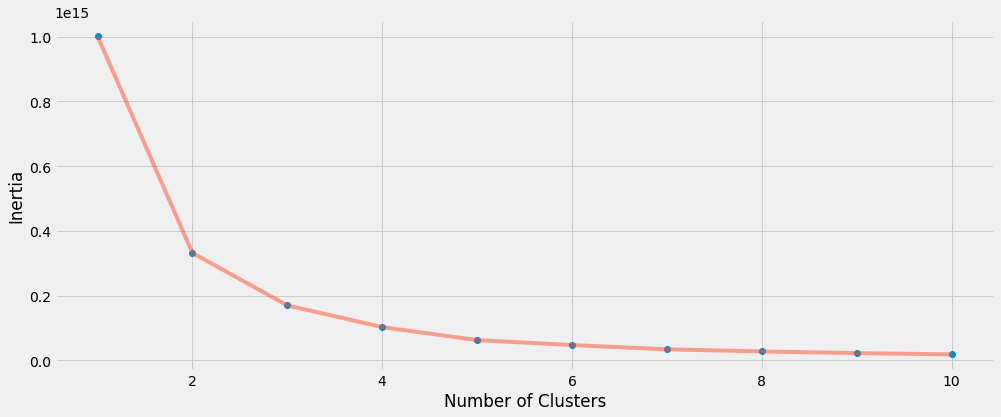

In [334]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [335]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [336]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Sold Price'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Sale price'),
            zaxis = dict(title  = 'Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)